**Task 1 – Problem Formulation, Data Acquisition and Preparation**

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('adult.csv', na_values= ['n/a','\s+','N/A'], delimiter=',')

In [47]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
#assign column name for dataframe 
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
             'hours-per-week', 'native-country', 'income']

df.columns = col_names


In [49]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
df.shape

(32560, 15)

In [52]:
#delete extra white space
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [53]:
#explore unique data in each column
for col in df:
    print(col, "::\n", df[col].unique(), "\n\n")

age ::
 [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 


workclass ::
 ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 


fnlwgt ::
 [ 83311 215646 234721 ...  34066  84661 257302] 


education ::
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 


education-num ::
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 


marital-status ::
 ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed'] 


occupation ::
 ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machi

In [54]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [55]:
#replace "?" with Null 
df=df.replace('?', np.NaN)

In [56]:
df.isin(['?']).sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [57]:
df.isnull().values.any()
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [58]:
df[df.columns[df.isnull().any() == True]] #display cols with missing values

,workclass,occupation,native-country
0,Self-emp-not-inc,Exec-managerial,United-States
1,Private,Handlers-cleaners,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Prof-specialty,Cuba
4,Private,Exec-managerial,United-States
...,...,...,...
32555,Private,Tech-support,United-States
32556,Private,Machine-op-inspct,United-States
32557,Private,Adm-clerical,United-States
32558,Private,Adm-clerical,United-States


In [59]:
print(df.isnull().any().sum()) #column
print(df.isnull().any(axis=1).sum()) #row

3
2399


In [60]:
df["workclass"]=df["workclass"].fillna(df["workclass"].mode())
df["occupation"]=df["occupation"].fillna(df["occupation"].mode())
df["native-country"]=df["native-country"].fillna(df["native-country"].mode())

In [61]:
print(df.isnull().any().sum()) #column
print(df.isnull().any(axis=1).sum()) #row

3
2399


In [62]:
print(df.duplicated().sum())

24


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
#duplicate = df[df.duplicated()]
duplicate=df[df.duplicated(keep=False)]

In [65]:
duplicate

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2302,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3916,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4324,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4766,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4939,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
5578,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5841,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [66]:
print(df.duplicated().sum())

24


In [67]:
df.drop_duplicates(inplace = True) #delete the data from the table inplace= True
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   workclass       30700 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education-num   32536 non-null  int64 
 5   marital-status  32536 non-null  object
 6   occupation      30693 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  object
 10  capital-gain    32536 non-null  int64 
 11  capital-loss    32536 non-null  int64 
 12  hours-per-week  32536 non-null  int64 
 13  native-country  31954 non-null  object
 14  income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None




**Task 2 – Data Exploration**

*2.1 Exploring each column  by using appropriate descriptive statistics and/or graphical visualisations*

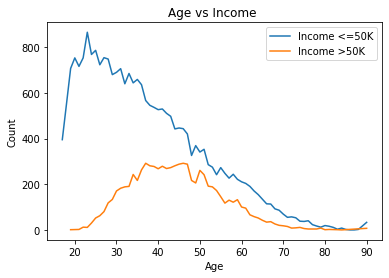

In [68]:
#1
df[df['income'] == "<=50K"]['age'].value_counts().sort_index().plot.line(label='Income <=50K')
df[df['income'] == ">50K"]['age'].value_counts().sort_index().plot.line(label='Income >50K')
plt.title("Age vs Income ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

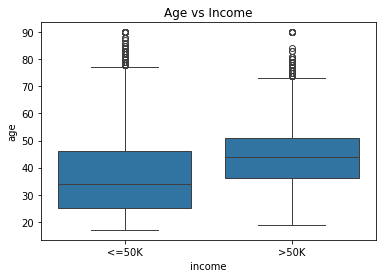

In [69]:
sns.boxplot(data=df, x='income', y='age')
plt.title('Age vs Income')
plt.show()

In [70]:
#2
g_workclass=df.groupby(["workclass","income"])["income"].count().sort_values(ascending=False)
print(g_workclass)

workclass         income
Private           <=50K     17712
                  >50K       4961
Self-emp-not-inc  <=50K      1816
Local-gov         <=50K      1476
State-gov         <=50K       944
Self-emp-not-inc  >50K        724
Self-emp-inc      >50K        622
Local-gov         >50K        617
Federal-gov       <=50K       589
Self-emp-inc      <=50K       494
Federal-gov       >50K        371
State-gov         >50K        353
Without-pay       <=50K        14
Never-worked      <=50K         7
Name: income, dtype: int64


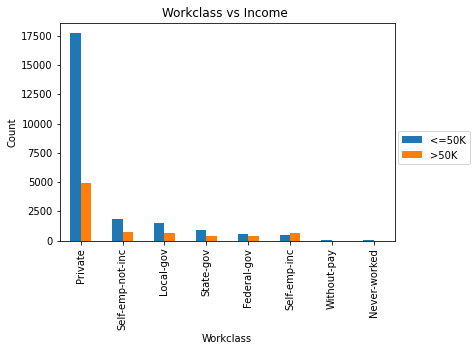

In [71]:
g_workclass.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")

plt.title("Workclass vs Income ")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [72]:
#3
g_education=df.groupby(["education","income"])["income"].count()
print(g_education)

education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3131
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8820
              >50K      1674
Masters       <=50K      763
              >50K       959
Preschool     <=50K       50
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5896
              >50K      1386
Name: income, dtype: int64


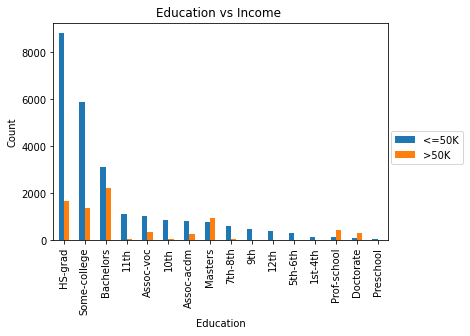

In [73]:
ax=g_education.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Education vs Income ")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))

plt.show()

In [74]:
#4
g_marital=df.groupby(["marital-status","income"])["income"].count().sort_values(ascending=False)
print(g_marital)

marital-status         income
Never-married          <=50K     10175
Married-civ-spouse     <=50K      8280
                       >50K       6690
Divorced               <=50K      3978
Separated              <=50K       959
Widowed                <=50K       908
Never-married          >50K        491
Divorced               >50K        463
Married-spouse-absent  <=50K       384
Widowed                >50K         85
Separated              >50K         66
Married-spouse-absent  >50K         34
Married-AF-spouse      <=50K        13
                       >50K         10
Name: income, dtype: int64


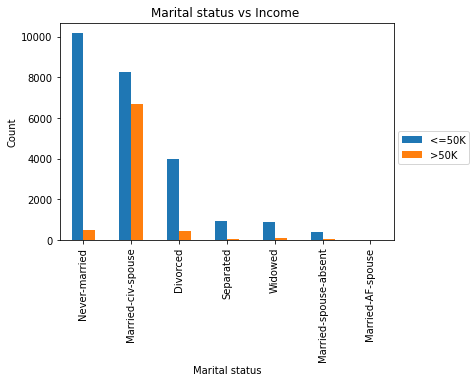

In [75]:
g_marital.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Marital status vs Income ")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [76]:
#5
g_occupation=df.groupby(["occupation","income"])["income"].count().sort_values(ascending=False)
print(g_occupation)

occupation         income
Adm-clerical       <=50K     3260
Craft-repair       <=50K     3165
Other-service      <=50K     3154
Sales              <=50K     2667
Prof-specialty     <=50K     2278
Exec-managerial    <=50K     2097
                   >50K      1968
Prof-specialty     >50K      1858
Machine-op-inspct  <=50K     1751
Handlers-cleaners  <=50K     1283
Transport-moving   <=50K     1277
Sales              >50K       983
Craft-repair       >50K       929
Farming-fishing    <=50K      877
Tech-support       <=50K      644
Adm-clerical       >50K       507
Protective-serv    <=50K      438
Transport-moving   >50K       320
Tech-support       >50K       283
Machine-op-inspct  >50K       249
Protective-serv    >50K       211
Priv-house-serv    <=50K      146
Other-service      >50K       137
Farming-fishing    >50K       115
Handlers-cleaners  >50K        86
Armed-Forces       <=50K        8
Priv-house-serv    >50K         1
Armed-Forces       >50K         1
Name: income, dtype: i

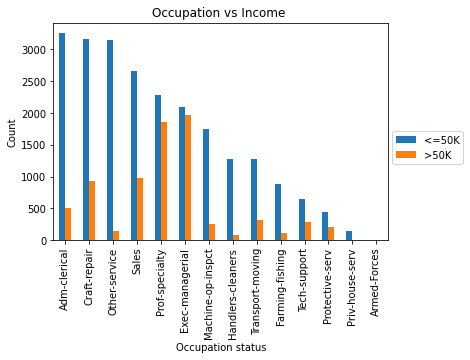

In [77]:
g_occupation.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Occupation vs Income ")
plt.xlabel("Occupation status")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [78]:
#6
g_relationship=df.groupby(["relationship","income"])["income"].count().sort_values(ascending=False)
print(g_relationship)

relationship    income
Not-in-family   <=50K     7435
Husband         <=50K     7271
                >50K      5916
Own-child       <=50K     4997
Unmarried       <=50K     3227
Other-relative  <=50K      944
Not-in-family   >50K       856
Wife            <=50K      823
                >50K       745
Unmarried       >50K       218
Own-child       >50K        67
Other-relative  >50K        37
Name: income, dtype: int64


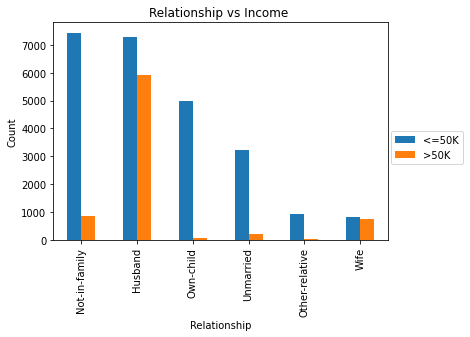

In [79]:
g_relationship.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Relationship vs Income ")
plt.xlabel("Relationship")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [80]:
#7
g_race=df.groupby(["race","income"])["income"].count().sort_values(ascending=False)
print(g_race)

race                income
White               <=50K     20679
                    >50K       7115
Black               <=50K      2735
Asian-Pac-Islander  <=50K       762
Black               >50K        387
Asian-Pac-Islander  >50K        276
Amer-Indian-Eskimo  <=50K       275
Other               <=50K       246
Amer-Indian-Eskimo  >50K         36
Other               >50K         25
Name: income, dtype: int64


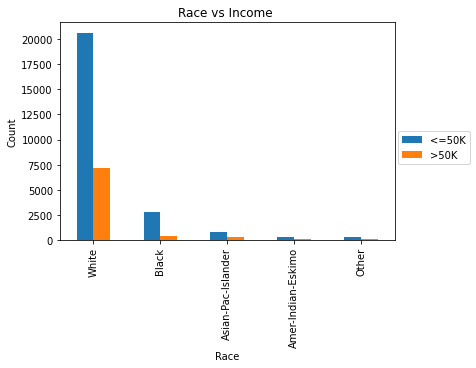

In [81]:
g_race.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Race vs Income ")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [82]:
#8
g_sex=df.groupby(["sex","income"])["income"].count().sort_values(ascending=False)
print(g_sex)

sex     income
Male    <=50K     15114
Female  <=50K      9583
Male    >50K       6660
Female  >50K       1179
Name: income, dtype: int64


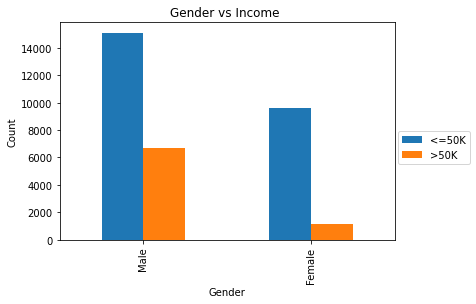

In [83]:
g_sex.unstack().sort_values(by=['<=50K', '>50K'], ascending=False).plot(kind="bar")
plt.title("Gender vs Income ")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(loc=(1.01,.35))
plt.show()

In [84]:
#9
df.groupby("income")["capital-gain"].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24697.0,148.802972,963.491286,0.0,0.0,0.0,0.0,41310.0
>50K,7839.0,4007.164562,14572.097223,0.0,0.0,0.0,0.0,99999.0


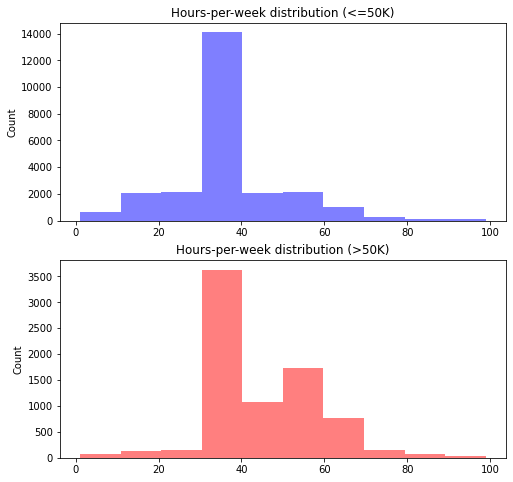

In [85]:
#10

fig, axs = plt.subplots(2, figsize=(8, 8))

axs[0].hist(df[df['income'] == "<=50K"]['hours-per-week'],color="blue",alpha=0.5, bins=10)
axs[0].set_title('Hours-per-week distribution (<=50K)')
axs[0].set_ylabel('Count')

axs[1].hist(df[df['income'] == ">50K"]['hours-per-week'], color="red",alpha=0.5, bins=10)
axs[1].set_title('Hours-per-week distribution (>50K)')
axs[1].set_ylabel('Count')

plt.show()


*2.2 Exploring the relationships between all pairs of columns*

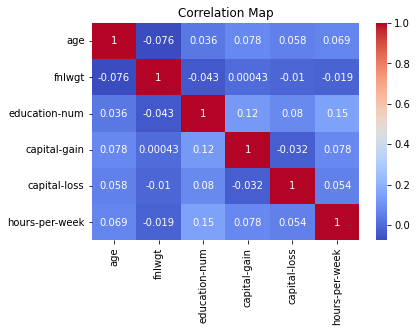

In [86]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Generate the heatmap
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2g', cmap='coolwarm').set_title('Correlation Map')

# Show the plot
plt.show()

In [87]:
#1 Age vs marital-status
g1=df.groupby(["marital-status"])["age"].mean().sort_values()
print(round(g1,2))

marital-status
Never-married            28.15
Married-AF-spouse        32.48
Separated                39.35
Married-spouse-absent    40.58
Divorced                 43.04
Married-civ-spouse       43.25
Widowed                  58.98
Name: age, dtype: float64


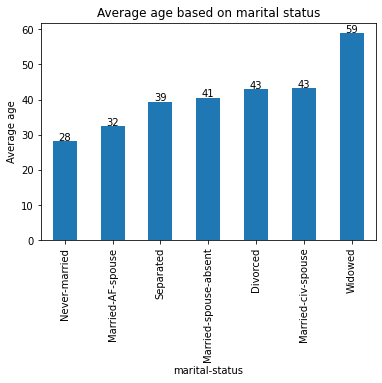

In [88]:
g1.plot(kind="bar",title="Average age based on marital status")
plt.ylabel("Average age")

ax = plt.gca()

# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height() 
    label = "{:.0f}".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()

In [89]:
#2 marital-status and sex
g2=df.groupby(["marital-status","sex"])["sex"].count().sort_values()
print(g2)

marital-status         sex   
Married-AF-spouse      Male          9
                       Female       14
Widowed                Male        168
Married-spouse-absent  Female      205
                       Male        213
Separated              Male        394
                       Female      631
Widowed                Female      825
Married-civ-spouse     Female     1657
Divorced               Male       1771
                       Female     2670
Never-married          Female     4760
                       Male       5906
Married-civ-spouse     Male      13313
Name: sex, dtype: int64


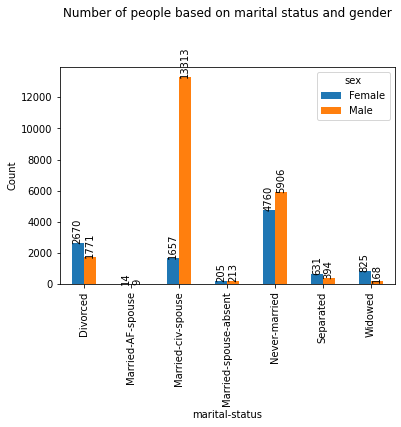

In [90]:
g2.unstack().plot(kind="bar")
plt.ylabel("Count")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Number of people based on marital status and gender", y=1.2)
plt.show()

In [91]:
#3 education vs income >50K
g3=df[df["income"]==">50K"].groupby(["education"])["education"].count().sort_values().astype(int)
print(g3)

education
1st-4th            6
5th-6th           16
9th               27
12th              33
7th-8th           40
11th              60
10th              62
Assoc-acdm       265
Doctorate        306
Assoc-voc        361
Prof-school      423
Masters          959
Some-college    1386
HS-grad         1674
Bachelors       2221
Name: education, dtype: int32


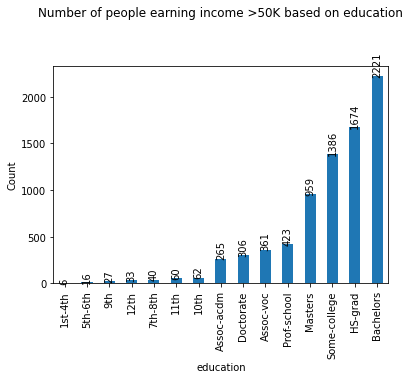

In [92]:
g3.plot(kind="bar")
plt.ylabel("Count")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Number of people earning income >50K based on education", y=1.2)
plt.show()

In [93]:
#4
g4=df[df["income"]==">50K"].groupby(["race","sex"])["sex"].count().sort_values().astype(int)
print(g4)

race                sex   
Other               Female       6
Amer-Indian-Eskimo  Female      12
Other               Male        19
Amer-Indian-Eskimo  Male        24
Asian-Pac-Islander  Female      43
Black               Female      90
Asian-Pac-Islander  Male       233
Black               Male       297
White               Female    1028
                    Male      6087
Name: sex, dtype: int32


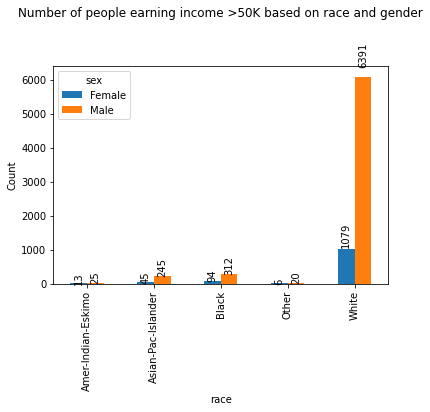

In [94]:
g4.unstack().plot(kind="bar")
plt.ylabel("Count")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()*1.05 
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Number of people earning income >50K based on race and gender", y=1.2)
plt.show()

In [95]:
#5 Age and hours-per-week
g5=df.groupby(["age"])["hours-per-week"].mean().reset_index()
#pd.set_option('display.max_rows', None)
print(g5)


    age  hours-per-week
0    17       21.367089
1    18       25.912727
2    19       30.718927
3    20       32.309840
4    21       34.045961
..  ...             ...
68   85       29.333333
69   86       40.000000
70   87        2.000000
71   88       40.000000
72   90       36.857143

[73 rows x 2 columns]


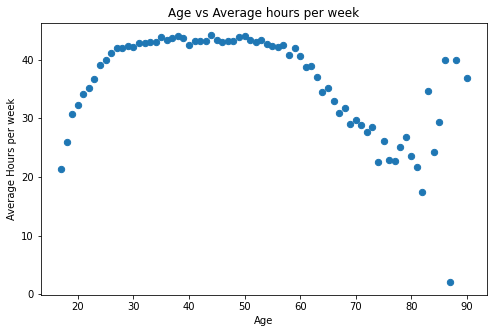

In [96]:
plt.figure(figsize=(8, 5))
plt.scatter(g5['age'], g5['hours-per-week'], s=40)
plt.title('Age vs Average hours per week')
plt.xlabel('Age')
plt.ylabel('Average Hours per week')
plt.show()

In [97]:
#6 hours-per-week vs occupation
g6=df.groupby(["occupation"])["hours-per-week"].mean().sort_values()
print(round(g6,2))


occupation
Priv-house-serv      32.79
Other-service        34.70
Adm-clerical         37.56
Handlers-cleaners    37.93
Tech-support         39.46
Armed-Forces         40.67
Machine-op-inspct    40.75
Sales                40.78
Craft-repair         42.31
Prof-specialty       42.39
Protective-serv      42.87
Transport-moving     44.66
Exec-managerial      44.99
Farming-fishing      46.99
Name: hours-per-week, dtype: float64


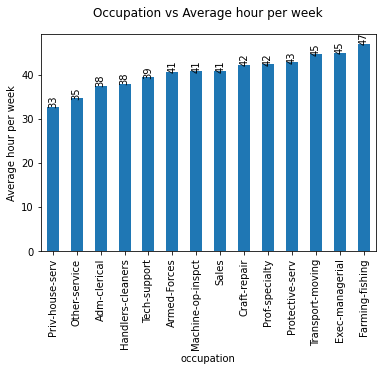

In [98]:
g6.plot(kind="bar")
plt.ylabel("Average hour per week")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height() 
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Occupation vs Average hour per week", y=1.05)
plt.show()

In [99]:
#7 hours-per-week vs workclass
g7=df.groupby(["workclass"])["hours-per-week"].mean().sort_values()
print(round(g7,2))

workclass
Never-worked        28.43
Without-pay         32.71
State-gov           39.03
Private             40.27
Local-gov           40.98
Federal-gov         41.38
Self-emp-not-inc    44.42
Self-emp-inc        48.82
Name: hours-per-week, dtype: float64


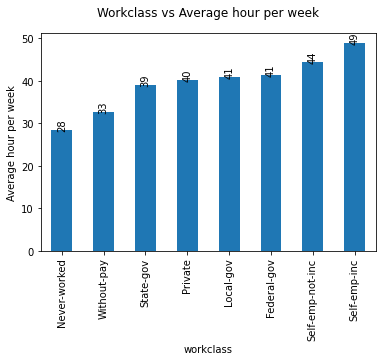

In [100]:
g7.plot(kind="bar")
plt.ylabel("Average hour per week")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height() 
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Workclass vs Average hour per week", y=1.05)
plt.show()

In [101]:
#8 hours-per-week vs workclass
g8=df.groupby(["relationship"])["hours-per-week"].mean().sort_values()
print(round(g8,2))

relationship
Own-child         33.28
Wife              36.86
Other-relative    37.01
Unmarried         39.10
Not-in-family     40.60
Husband           44.12
Name: hours-per-week, dtype: float64


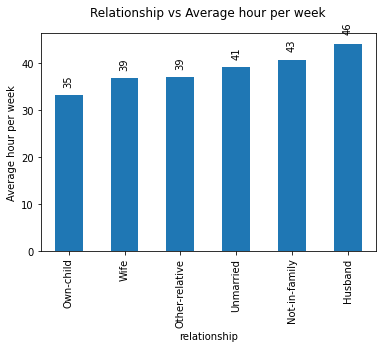

In [102]:
g8.plot(kind="bar")
plt.ylabel("Average hour per week")

ax = plt.gca()

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()*1.05 
    label = "{:.0f}".format(y) 

    ax.annotate(label,
                (x, y), 
                textcoords="offset points",
                xytext=(0,1), 
                ha='center',
                rotation=90)
ax.set_title("Relationship vs Average hour per week", y=1.05)
plt.show()

In [103]:
#9 occupation & work class
g9 = df.groupby(["education","workclass"]).size().unstack()
print(g9)

workclass     Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
education                                                                   
10th                  6.0       31.0           2.0    695.0          19.0   
11th                  9.0       36.0           1.0    923.0          14.0   
12th                  5.0       19.0           NaN    333.0           7.0   
1st-4th               NaN        4.0           NaN    134.0           2.0   
5th-6th               1.0        9.0           NaN    265.0           4.0   
7th-8th               2.0       28.0           1.0    423.0          14.0   
9th                   3.0       23.0           NaN    387.0          10.0   
Assoc-acdm           55.0       88.0           NaN    729.0          35.0   
Assoc-voc            38.0       86.0           NaN   1005.0          38.0   
Bachelors           212.0      477.0           NaN   3549.0         273.0   
Doctorate            16.0       27.0           NaN    181.0          35.0   

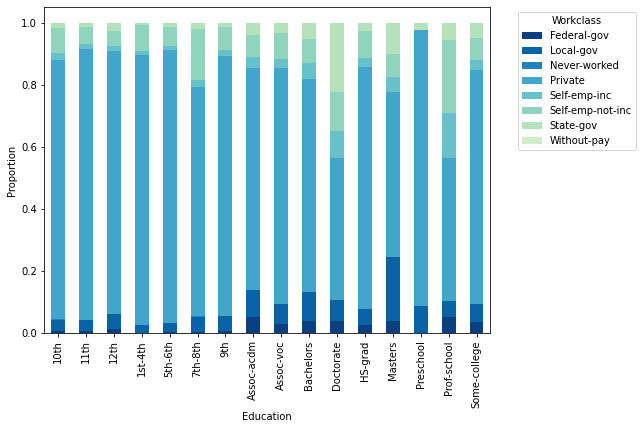

In [104]:
g9_prop = g9.div(g9.sum(axis=1), axis=0)
colors = plt.cm.GnBu(np.linspace(0, 1, 10))[::-1]
g9_prop.sort_values(by='education').plot(kind='bar', stacked=True, figsize=(8, 6),color=colors)
plt.xlabel("Education")
plt.ylabel("Proportion")

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
plt.legend(title='Workclass', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [105]:
df['age'].describe()

count    32536.000000
mean        38.585536
std         13.638193
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [106]:
#10 age and income >50K
age_bin=[15,30,45,60,75,90]
df['ageBin']=pd.cut(df['age'],bins=age_bin)
df[["age","ageBin"]]

,age,ageBin
0,50,"(45, 60]"
1,38,"(30, 45]"
2,53,"(45, 60]"
3,28,"(15, 30]"
4,37,"(30, 45]"
...,...,...
32555,27,"(15, 30]"
32556,40,"(30, 45]"
32557,58,"(45, 60]"
32558,22,"(15, 30]"


In [107]:
g10=df[df["income"]==">50K"].groupby(["ageBin"])["income"].count().sort_values()
g10_num=g10.count()
g10_sum= g10.sum()

Text(0.5, 1.4, 'People earning income >50K in Different Age Groups')

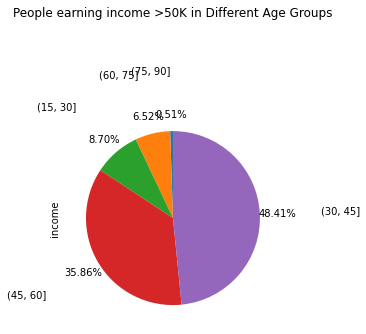

In [108]:
g10.plot(kind='pie',autopct='%1.2f%%',startangle=90, pctdistance=1.2,labeldistance=1.7,)
plt.title('People earning income >50K in Different Age Groups', y=1.4)

*2.3 Posing one meaningful question and exploring the data by using appropriate methods to find its
answer*

In [109]:
#Question:within occupation, which gender has the highest number of people earning income > 50K?

In [110]:
occ_sex=df[df["income"]==">50K"].groupby(["occupation","sex"])["income"].count()
print(occ_sex)

occupation         sex   
Adm-clerical       Female     212
                   Male       295
Armed-Forces       Male         1
Craft-repair       Female      20
                   Male       909
Exec-managerial    Female     280
                   Male      1688
Farming-fishing    Female       2
                   Male       113
Handlers-cleaners  Female       4
                   Male        82
Machine-op-inspct  Female      20
                   Male       229
Other-service      Female      51
                   Male        86
Priv-house-serv    Female       1
Prof-specialty     Female     385
                   Male      1473
Protective-serv    Female      10
                   Male       201
Sales              Female      88
                   Male       895
Tech-support       Female      45
                   Male       238
Transport-moving   Female       9
                   Male       311
Name: income, dtype: int64


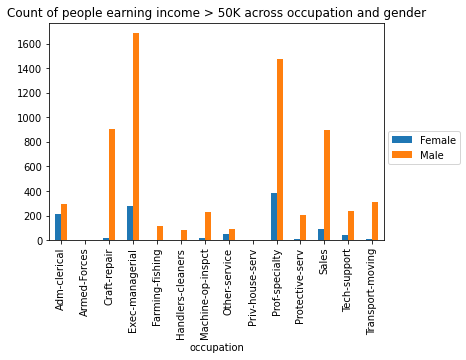

In [111]:
occ_sex.unstack().plot(kind="bar",title="Count of people earning income > 50K across occupation and gender")
plt.legend(loc=(1.01,.35))

**Task 3 – Data Modelling**

*Data preparation & feature encoding*

In [112]:
#replace target column with number 0,1
df['income_number']=df['income'].map({'<=50K':0, '>50K':1})
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,ageBin,income_number
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,"(15, 30]",0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,"(30, 45]",1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,"(45, 60]",0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,"(15, 30]",0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,"(45, 60]",1


In [113]:
clean_df=df

In [114]:
clean_df.drop(['fnlwgt','income'],axis=1,inplace=True)

In [115]:
clean_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,ageBin,income_number
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,"(45, 60]",0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,"(30, 45]",0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,"(45, 60]",0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,"(15, 30]",0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,"(30, 45]",0


In [134]:
#feature encoding to change catagorical column to numerical column
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [136]:
columns_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
transformed_data = ohe.fit_transform(clean_df[columns_encode])
feature_names = ohe.get_feature_names_out(columns_encode)
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
transformed_df.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_nan,education_11th,education_12th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
#Scaler
scalar=MinMaxScaler(feature_range=(0,1))
transformed_df=scalar.fit_transform(transformed_df)
transformed_df = pd.DataFrame(transformed_df)
transformed_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
count,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,...,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,0.064329,0.000215,0.696859,0.034300,0.078067,0.039864,0.000430,0.056430,0.036114,0.013308,...,0.003504,0.000369,0.002459,0.001567,0.000553,0.000584,0.895992,0.002059,0.000492,0.017888
std,0.245341,0.014667,0.459623,0.182003,0.268282,0.195642,0.020739,0.230753,0.186576,0.114593,...,0.059090,0.019201,0.049526,0.039561,0.023515,0.024159,0.305275,0.045333,0.022171,0.132546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model: RandomForestClassifier, Test Size: 0.5
Accuracy: 0.9846
Precision: 0.5981
Recall: 0.4369
F1-score: 0.5049



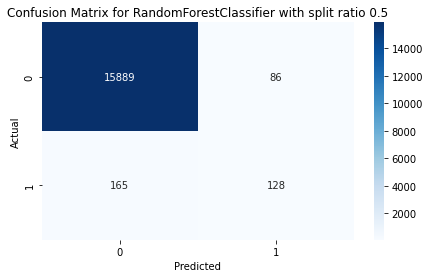

Model: DecisionTreeClassifier, Test Size: 0.5
Accuracy: 0.9988
Precision: 0.9660
Recall: 0.9693
F1-score: 0.9676



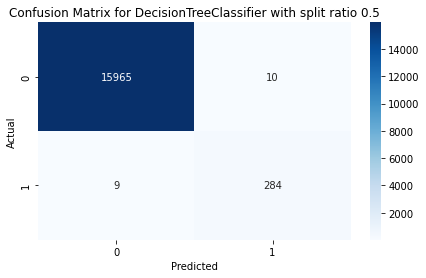

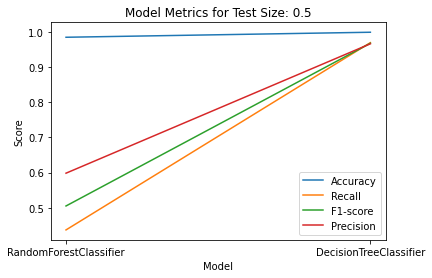

-----------------------------------------------------------------------------------------
Model: RandomForestClassifier, Test Size: 0.4
Accuracy: 0.9855
Precision: 0.6386
Recall: 0.4511
F1-score: 0.5287



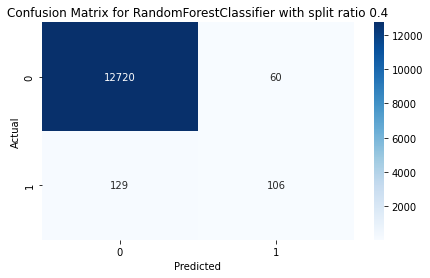

Model: DecisionTreeClassifier, Test Size: 0.4
Accuracy: 0.9993
Precision: 0.9829
Recall: 0.9787
F1-score: 0.9808



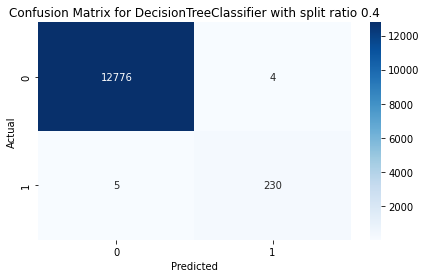

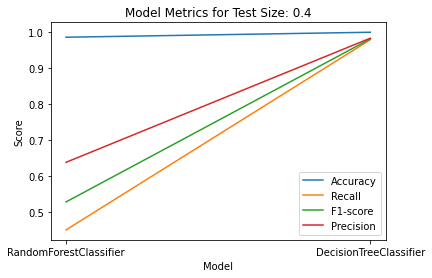

-----------------------------------------------------------------------------------------
Model: RandomForestClassifier, Test Size: 0.2
Accuracy: 0.9891
Precision: 0.7188
Recall: 0.6106
F1-score: 0.6603



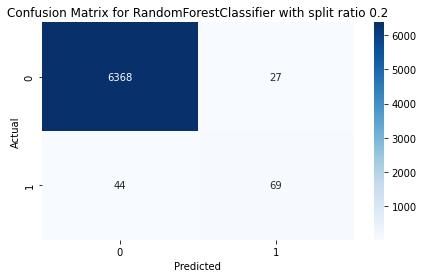

Model: DecisionTreeClassifier, Test Size: 0.2
Accuracy: 0.9994
Precision: 0.9823
Recall: 0.9823
F1-score: 0.9823



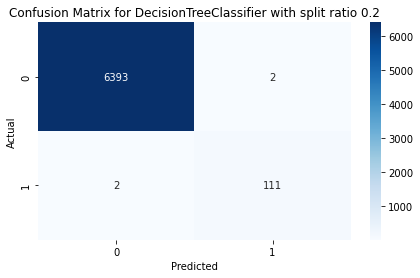

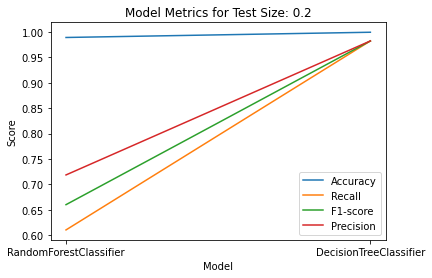

-----------------------------------------------------------------------------------------


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
  

X = transformed_df.iloc[:, :-1]
Y = transformed_df.iloc[:, -1]

models = [RandomForestClassifier(), DecisionTreeClassifier()]
split_ratios = [0.5, 0.4, 0.2]

# Loop over split ratios
for split in split_ratios:
    accuracy_scores = []
    recall_scores = []
    f1_scores = []
    precision_scores = []
    
    # Loop over models
    for model in models:
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=split, random_state=1)

        # Train the model
        model.fit(X_train, Y_train)

        # Make predictions
        Y_pred = model.predict(X_test)

        # Calculate accuracy, precision, recall, and F1-score
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)

        print(f"Model: {type(model).__name__}, Test Size: {split}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}\n")
        
        # Plot the confusion matrix
        plt.figure(figsize=(7, 4))
        sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Blues', fmt='')
        plt.title(f'Confusion Matrix for {type(model).__name__} with split ratio {split}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        # Append scores to the lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Plot the graph for the current split ratio
    plt.plot([type(model).__name__ for model in models], accuracy_scores, label='Accuracy')
    plt.plot([type(model).__name__ for model in models], recall_scores, label='Recall')
    plt.plot([type(model).__name__ for model in models], f1_scores, label='F1-score')
    plt.plot([type(model).__name__ for model in models], precision_scores, label='Precision')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Model Metrics for Test Size: {split}')
    plt.legend()
    plt.show()

    print("-----------------------------------------------------------------------------------------")
